# Auswertung

## Python Module

In [1]:
#Importieren von allen benötigten Modulen
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import scipy.integrate as integrate
from scipy.stats import chi2
import io
import matplotlib
matplotlib.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = 16, 9

## Teil 1: Frequenzgang $g(f)$

Es da für die weitere Betrachtung der Frequenzgang $g(f)$ notwendig sein wird, ist es sinnvoll diesen als erstes zu bestimmen.

### Importieren der Messdaten

In [2]:
f, U_aus=np.loadtxt('data/A3 Frequenzgang_Daten.txt', skiprows=1, usecols=(0,1), unpack=True)

fehler_f = f * 0.01
fehler_U_aus = np.zeros(U_aus.size) + 0.001
U_ein = 0.2
fehler_U_ein = 0.01

### Berechnung des Frequenzgangs $g(f)$

\begin{align}
    g(f) &= \frac{1}{D} \frac{U_{aus}}{U_{ein}}\\
    \Delta g(f) &= \sqrt{\left(\frac{\Delta U_{aus}}{U_{aus}} \right)^2 + \left(\frac{\Delta U_{ein}}{U_{ein}} \right)^2 + \left(\frac{\Delta D}{D} \right)^2} \cdot g(f)
\end{align}

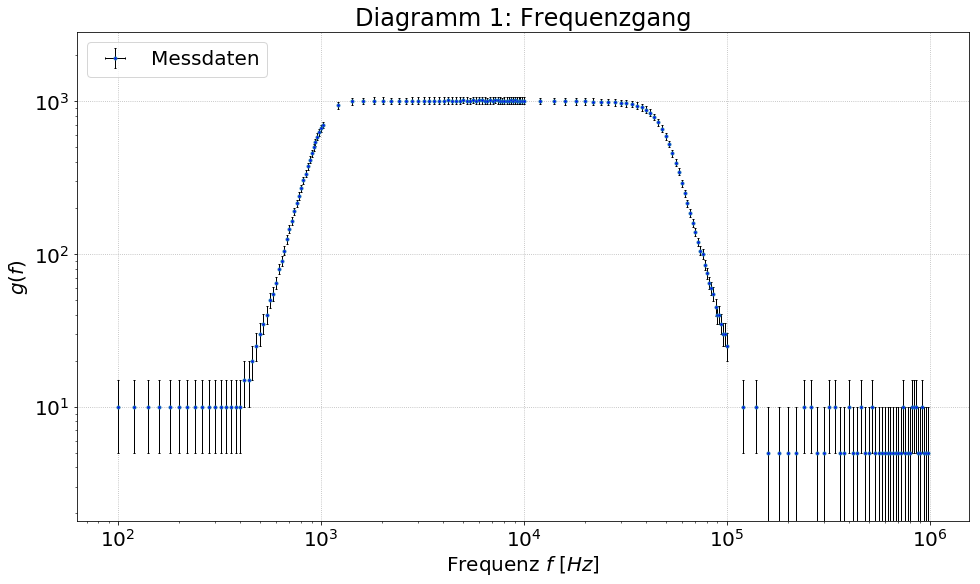

In [3]:
D = 1e-3
fehler_D = D*0.002
g = U_aus/(D*U_ein)
fehler_g = np.sqrt((fehler_U_aus/U_aus)**2+(fehler_D/D)**2+(fehler_U_ein/U_ein)**2)*g

#darzustellende Daten
x = f
y = g
delta_x = fehler_f
delta_y = fehler_g

#Plot-Umgebung
x_fit = [min(x), max(x)]
fit = [min(y)/2, max(y)*2]

#Plot
plt.errorbar(x, y, yerr=delta_y, xerr=delta_x, lw= 1, ecolor='k', 
             fmt='.',mfc='b', capsize=1, label='Messdaten')
plt.title('Diagramm 1: '+'Frequenzgang')
plt.grid(ls=':')
plt.xscale('log')
plt.yscale('log')
plt.plot(x_fit, fit, lw=0)
plt.xlabel('Frequenz '+r'$f$'+' '+r'${[Hz]}$')
plt.ylabel('$g(f)$')
plt.legend(loc='best')
plt.show()

### Ausgewählte Messwerte

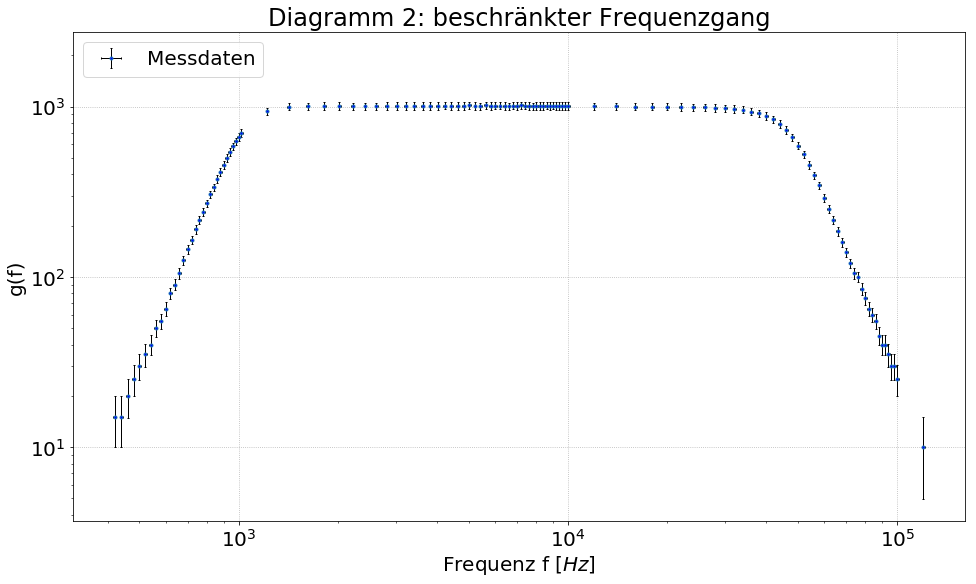

In [4]:
#Messdaten laden
f, U_aus = np.loadtxt('data/A3 Frequenzgang_Daten.txt', skiprows=1, usecols=(0,1), unpack=True)
fehler_f = f * 0.01
fehler_U_aus = np.zeros(U_aus.size) + 0.001
U_ein = 0.2
fehler_U_ein = 0.01

#g berechnen
D = 1e-3
fehler_D = D*0.002
g = U_aus/(D*U_ein)
fehler_g = np.sqrt((fehler_U_aus/U_aus)**2+(fehler_D/D)**2+(fehler_U_ein/U_ein)**2)*g

#darzustellende Daten
start = 16
cut = 43
x = f[start:-cut]
y = g[start:-cut]
delta_x = fehler_f[start:-cut]
delta_y = fehler_g[start:-cut]

#Plot-Umgebung
x_fit = [min(x), max(x)]
fit = [min(y)/2, max(y)*2]

#Plot
plt.errorbar(x, y, yerr=delta_y, xerr=delta_x, lw= 1, 
             ecolor='k',mfc='b', fmt='.', capsize=1, label='Messdaten')
plt.title('Diagramm 2: '+'beschränkter Frequenzgang')
plt.grid(ls=':')
plt.xscale('log')
plt.yscale('log')
plt.plot(x_fit, fit, lw=0)
plt.xlabel('Frequenz '+r'f'+' '+r'${[Hz]}$')
plt.ylabel('g(f)')
plt.legend(loc='best')
plt.show()

### Fitfunktion für ausgewählte Messwerte

In [5]:
#Fitfunktion an Ausgewählte Messwerte

#Messdaten laden
f, U_aus = np.loadtxt('data/A3 Frequenzgang_Daten.txt', skiprows=1, usecols=(0,1), unpack=True)
fehler_f = f * 1e-2
fehler_U_aus = np.zeros(U_aus.size) + 1e-3

U_ein = 0.2
fehler_U_ein = 1e-2

#g berechnen
D = 1e-3
fehler_D = D*0.002
g = U_aus/(D*U_ein)
fehler_g = np.sqrt((fehler_U_aus/U_aus)**2+(fehler_D/D)**2+(fehler_U_ein/U_ein)**2)*g

### Fit über orthogonal distance regression (ODR)

\begin{align}
    g(f)_{fit}=\frac{V}{\sqrt{1+1 /\left(f / \Omega_{1}\right)^{2 n_{1}}} \sqrt{1+\left(f / \Omega_{2}\right)^{2 n_{2}}}}
\end{align}

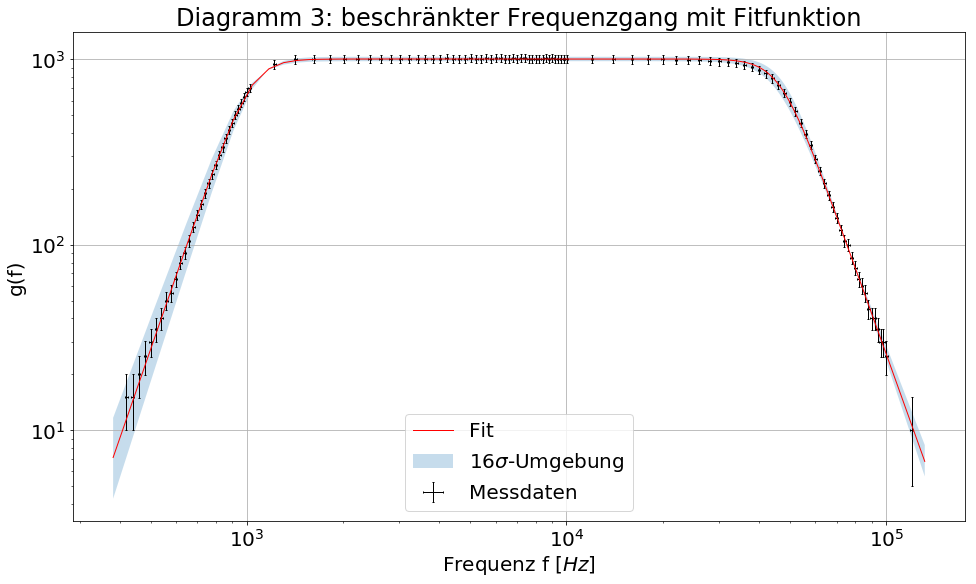

V = 1005.940 ± 1.715
W_1 = 1030.863 ± 1.816
W_2 = 46660.589 ± 91.115
n_1 = 4.986 ± 0.024
n_2 = 4.808 ± 0.022


Chi-Quadrat = 7.83066921825803
Freiheitsgrade = 117
Chi-Quadrat reduziert = 0.06692879673724812
Wahrscheinlichkeit ein größeresoder gleiches Chi-Quadrat zu erhalten = 100 %


In [6]:
from scipy import odr

def fit_func(p, x):
    V, W1, W2, n1, n2 = p
    return V/(np.sqrt(1+1/(x/W1)**(2*n1))*np.sqrt(1+(x/W2)**(2*n2)))

model = odr.Model(fit_func)

#darzustellende Daten
start = 16
cut = 43
x = f[start:-cut]
y = g[start:-cut]
delta_x = fehler_f[start:-cut]
delta_y = fehler_g[start:-cut]

#Startparameter
para0 = [1000, 1000, 50000, 5, 5]

data = odr.RealData(x, y, sx=delta_x, sy=delta_y)
odr = odr.ODR(data, model, beta0=para0)
out = odr.run()

#1-Sigma
popt = out.beta
perr = out.sd_beta

#Sigma-Umgebung
nstd = 16 #um n-Sigma-Umgebung zu zeichnen
popt_top = popt+nstd*perr
popt_bot = popt-nstd*perr

#Plot-Umgebung
x_fit = np.linspace(min(x)/1.1, max(x)*1.1, 1000)
fit = fit_func(popt, x_fit)
fit_top = fit_func(popt_top, x_fit)
fit_bot = fit_func(popt_bot, x_fit)
                                              
#Plot
fig, ax = plt.subplots(1)
plt.errorbar(x, y, yerr=delta_y, xerr=delta_x, lw= 1, ecolor='k', 
             fmt='none', capsize=1, label='Messdaten')
plt.title('Diagramm 3: '+'beschränkter Frequenzgang mit Fitfunktion')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.plot(x_fit, fit, 'r', lw=1, label='Fit')
plt.xlabel('Frequenz '+r'f'+' '+r'${[Hz]}$')
plt.ylabel('g(f)')
ax.fill_between(x_fit, fit_top, fit_bot, alpha=.25, label=str(nstd)+r'$\sigma$'+'-Umgebung')
plt.legend(loc='best')
plt.show()

#Chi-Quadrat orthogonal
from scipy.stats import chi2

dof = x.size-popt.size
chisquare = np.sum(((fit_func(popt, x)-y)**2)/
                   (delta_y**2+((fit_func(popt, x+delta_x)-fit_func(popt, x-delta_x))/2)**2))
chisquare_red = chisquare/dof
prob = round(1-chi2.cdf(chisquare,dof),2)*100

def form(val,err): #form function for prints
        a = "{value:4.3f} ± {error:4.3f}".format(value=val,error=err)
        return a

print('V =', form(popt[0],perr[0]))
print('W_1 =', form(popt[1],perr[1]))
print('W_2 =', form(popt[2],perr[2]))
print('n_1 =', form(popt[3],perr[3]))
print('n_2 =', form(popt[4],perr[4]))
print('\n')
print('Chi-Quadrat =', chisquare)
print('Freiheitsgrade =', dof)
print('Chi-Quadrat reduziert =', chisquare_red)
print('Wahrscheinlichkeit ein größeres' + 
      'oder gleiches Chi-Quadrat zu erhalten = {value:.0f}'.format(value=prob), '%')

#### Numerische Integration

In [7]:
#Integral berechnen
import scipy.integrate as integra

def fit_func_square(x, p):
    return fit_func(p, x)**2

B = integra.quad(fit_func_square, f[start], f[-cut], args=popt)

print('B, das Integral von', f[start], 'Hz < f <', f[-cut],'beträgt ',form(B[0],B[1]),'[Hz]')


B, das Integral von 420.0 Hz < f < 140020.0 beträgt  47005968269.008 ± 0.099 [Hz]


\begin{align}
\int_{420 \ \text{[Hz]}}^{140020 \ \text{[Hz]}} \ g(f)^2 \ df = 47 \cdot 10^{9} \cdot 10^8
\end{align}

## Teil 2: Bestimmung der Boltzmann-Konstanten aus der gemessenen Rauschspannung

### Messwerte für Widerstand $R$ und Rauschspannung $\langle U_r \rangle$

In [11]:
R=np.array([5e3, 10e3, 15e3, 20e3, 25e3, 30e3])

U_aus=np.array([2.4191,3.1280,3.7061,4.212,4.6675,5.0841])*1e-3 #Volt
U_aus_err=np.array([9,13,14,18,18,20])*1e-4/np.sqrt(100)*1e-3

U_V=1.3962e-3
U_V_err=(0.00532/np.sqrt(114))*1e-3

diff_U=U_aus**2-U_V**2
diff_U_err=np.sqrt((2*U_aus*U_aus_err)**2+(2*U_V*U_V_err)**2)

### Linearer Fit

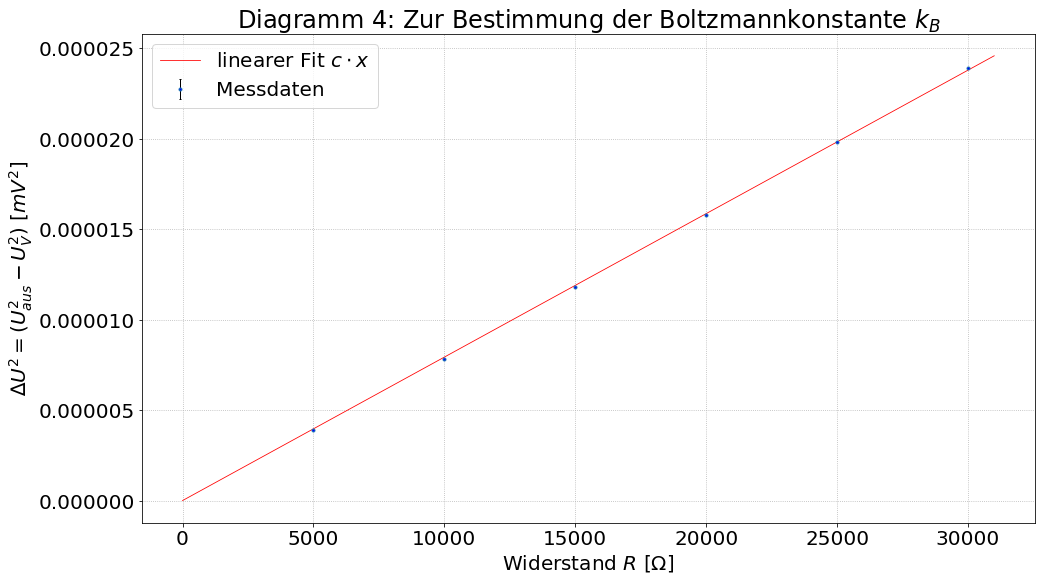

c = 7.926801655200442e-10  ±  3.6239627260594635e-24 [mV^2/Ohm]


Chi-Quadrat = 7.83066921825803
Freiheitsgrade = 5
Chi-Quadrat reduziert = 0.06692879673724812
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 0 %


In [16]:
def linear(x,c):
    return c*x

popt2,pcov2= curve_fit(linear,R,diff_U)
X = np.linspace(0,31e3,100)
#Plot der Messdaten mit linearem Fit
plt.errorbar(R,diff_U, yerr=diff_U_err,  lw= 1, ecolor='k', fmt='.',
             mfc='b', capsize=1, label='Messdaten')
plt.plot(X,linear(X,*popt2), linewidth=0.8, color='red', label=r'linearer Fit $c\cdot x$')
plt.xlabel(r'Widerstand $R$ [$\Omega$]')
plt.ylabel(r'$∆U^2=(U_{aus}^2-U_V^2)$ [$mV^2$]')
plt.title(r'Diagramm 4: Zur Bestimmung der Boltzmannkonstante $k_B$')
plt.grid(ls=':')
plt.legend(loc='best')
plt.show()

#Chi-Quadrat orthogonal
from scipy.stats import chi2

dof=5
chi_squared=np.sum((linear(R,*popt2)-diff_U)**2/diff_U_err**2)
chi_squared_red=chi_squared/dof
prob=round(1-chi2.cdf(chi_squared,dof),2)*100

print('c =', popt2[0],' ± ',pcov2[0][0],'[mV^2/Ohm]')
print('\n')
print('Chi-Quadrat =', chisquare)
print('Freiheitsgrade =', dof)
print('Chi-Quadrat reduziert =', chisquare_red)
print('Wahrscheinlichkeit ein größeres oder gleiches'+
      ' Chi-Quadrat zu erhalten = {value:.0f}'.format(value=prob), '%')

In [17]:
#Theorie: c=4kTB

T=300 #K
T_err=0.2

#Fehler für B abschätzen (systematisch) 
B_err=0.02*B[0]

k=popt2[0]/(4*B[0]*T)

ke1 = pcov2[0][0]**0.5/popt2[0]
ke2 = B_err/B[0]
ke3 = T_err/T

k_err=k*np.sqrt((pcov2[0,0]**0.5/popt2[0])**2+(B_err/B[0])**2+(T_err/T)**2)
k_std=k*(pcov2[0,0]**0.5/popt2[0])

#Literaturwert
k_lit=1.381e-23

#Differenz Messwert-Literatur
diff_k=np.abs(k-k_lit)

print('Aus unseren Messwerten folgt für die Boltzmannkonstante:')
print('k = ' + str(k) + ' ± ' + str(k_err+k_std),'[m^2 kg s^(-2) K(-1)]')
print('=> sig = ',diff_k/(k_err+k_std))

Aus unseren Messwerten folgt für die Boltzmannkonstante:
k = 1.405282837319126e-23 ± 3.1697928873774797e-25 [m^2 kg s^(-2) K(-1)]
=> sig =  0.7660701560604601


\begin{align}
    k_B^{fit} &= 1.4104 \pm 0.0317 \cdot 10^{-23} &\text{[m$^2$ kg s$^{-2}$ K$^{-1}$]}\\
    k_B^{lit} &= 1.381 \cdot 10^{-23} &\text{[m$^2$ kg s$^{-2}$ K$^{-1}$]}\\
    & \Rightarrow 0.766\sigma
\end{align}